# Dataset

In [1]:
import os
import zipfile
from tensorflow import keras

# Download and unzip dataset
dataset_url = "https://github.com/alex-s-888/Blurry-Image-Detection/raw/refs/heads/main/dataset/blur-noblur.zip"
zip_file_path = keras.utils.get_file(origin=dataset_url, extract=False)
zip_ref = zipfile.ZipFile(zip_file_path, 'r')
# Extract to same name without the .zip extension
extract_dir = os.path.splitext(zip_file_path)[0]
# Extract the files
zip_ref.extractall(extract_dir)
zip_ref.close()

3390810/3390810 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Samples of images in dataset

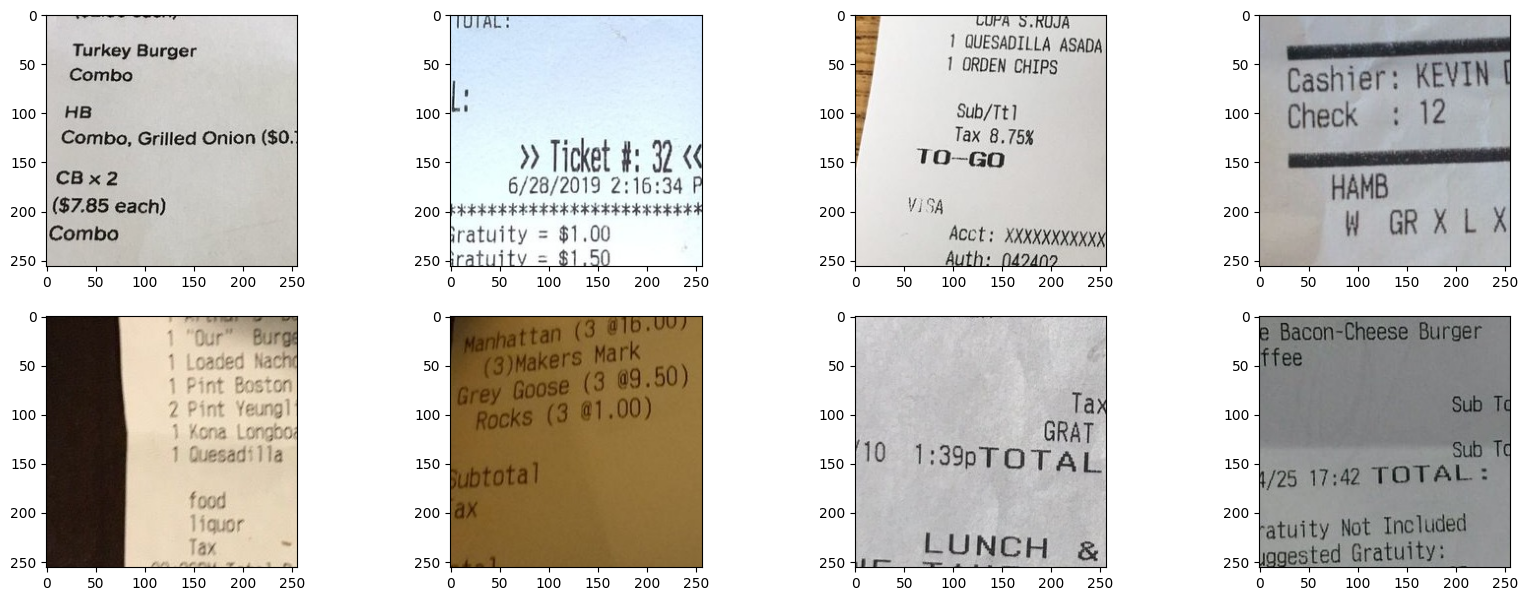

In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Samples of non-blurred images

images = []
for img_path in glob.glob(extract_dir + '/train/noblur/*.jpg'):
    images.append(mpimg.imread(img_path))
    if len(images) > 7:
        break

fig = plt.figure(figsize=(20, 15))
columns = 4
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
    plt.imshow(image)


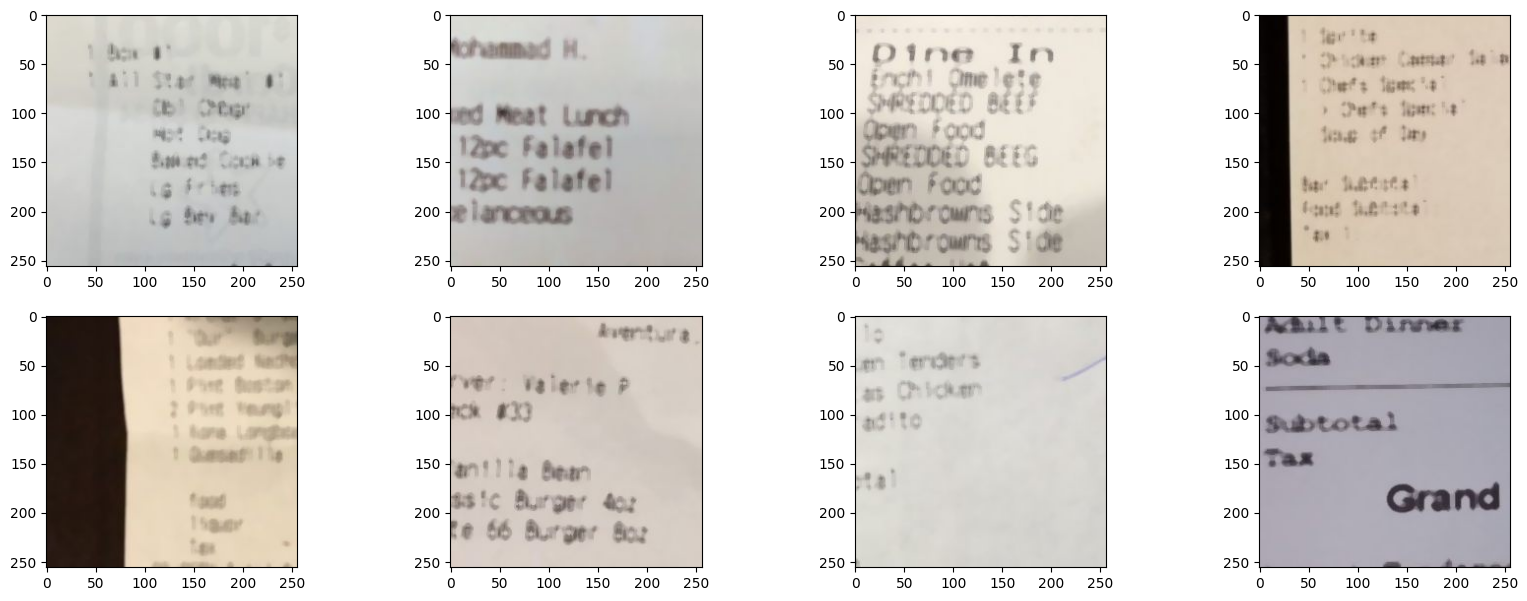

In [ ]:
# Samples of blurred images

images = []
for img_path in glob.glob(extract_dir + '/train/blurred/*.jpg'):
    images.append(mpimg.imread(img_path))
    if len(images) > 7:
        break

fig = plt.figure(figsize=(20, 15))
columns = 4
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
    plt.imshow(image)

# FFT - Fast Fourier Transform  
We will use the mean value of magnitude spectrum to distinguish blurred and non-blurred images. Let's examine how this value differs for these groups.

In [4]:
import numpy as np
from PIL import Image

In [5]:
def load_image_as_array(image_path):
  try:
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array
  except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    return None
  except Exception as e:
    print(f"Error reading image: {e}")
    return None


In [6]:
def to_grayscale(image_array):
  return np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])


In [7]:
def fft_mean_magnitude(image_array):
  # Perform FFT
  f = np.fft.fft2(image_array)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20 * np.log(np.abs(fshift))

  # Calculate the mean of the magnitude spectrum
  mean_magnitude = np.mean(magnitude_spectrum)
  return mean_magnitude

In [12]:
means_noblur = []
for img_path in glob.glob(extract_dir + '/train/noblur/*.jpg'):
    means_noblur.append(fft_mean_magnitude(to_grayscale(load_image_as_array(img_path))))



In [9]:
means_blurred = []
for img_path in glob.glob(extract_dir + '/train/blurred/*.jpg'):
    means_blurred.append(fft_mean_magnitude(to_grayscale(load_image_as_array(img_path))))


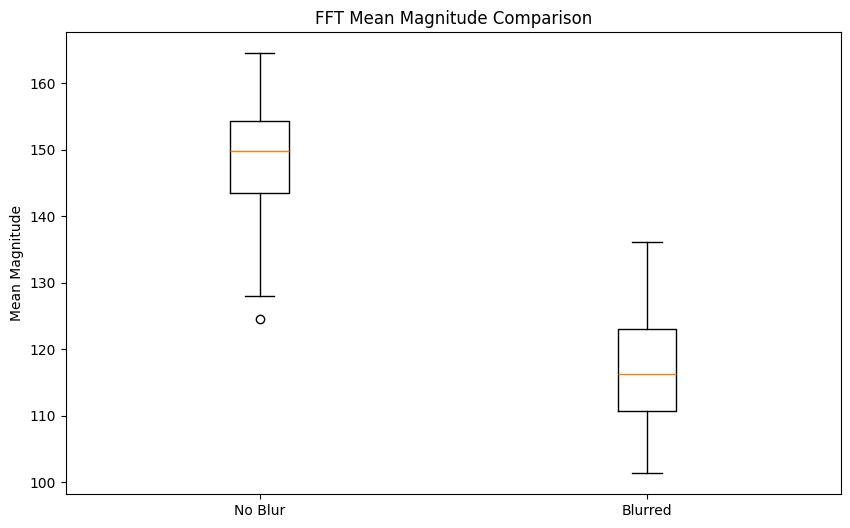

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([means_noblur, means_blurred], tick_labels=['No Blur', 'Blurred'])
plt.title('FFT Mean Magnitude Comparison')
plt.ylabel('Mean Magnitude')
plt.show()


# Conclusion
We can use value 135 as threshold when predicting image blurriness.